<a href="https://colab.research.google.com/github/chsachin799/100-days-of-ML/blob/main/48_PCA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(23)

In [8]:
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1,cov_mat1,20)

df = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target']=1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2,cov_mat2,20)

df1 = pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])
df1['target']=0

df = pd.concat([df,df1],ignore_index=True)
df = df.sample(40)

In [9]:
df.head()

,feature1,feature2,feature3,target
12,0.185604,-2.134994,-0.430761,1
29,2.513882,1.113427,-1.124398,0
8,0.675201,1.091921,0.229955,1
33,2.980712,0.207113,1.170999,0
19,-1.369897,-0.270642,1.744011,1


In [12]:
#Target: To convert this 3D data to 2D data
#Visualizing the data in 3D mode

import plotly.express as px


fig = px.scatter_3d(df, x='feature1', y='feature2', z='feature3',
                    color=df['target'].astype(str))

fig.update_traces(marker=dict(size=8,
                              line=dict(width=2, color='DarkSlateGrey')))
fig.show()

In [13]:
#Step 1 - Apply Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [15]:
#Step 2- Find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n',covariance_matrix)

Covariance Matrix:
 [[1.02564103 0.40481775 0.09833697]
 [0.40481775 1.02564103 0.10961302]
 [0.09833697 0.10961302 1.02564103]]


In [16]:
# Step 3 - Finding Eigen values and Eigen Vectors
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [17]:
eigen_values

array([1.47823882, 0.62065522, 0.97802904])

In [20]:
eigen_vectors

array([[-0.67045973, -0.70423894, -0.23351932],
       [-0.67452388,  0.70965023, -0.20350449],
       [-0.30903283, -0.0210728 ,  0.95081788]])

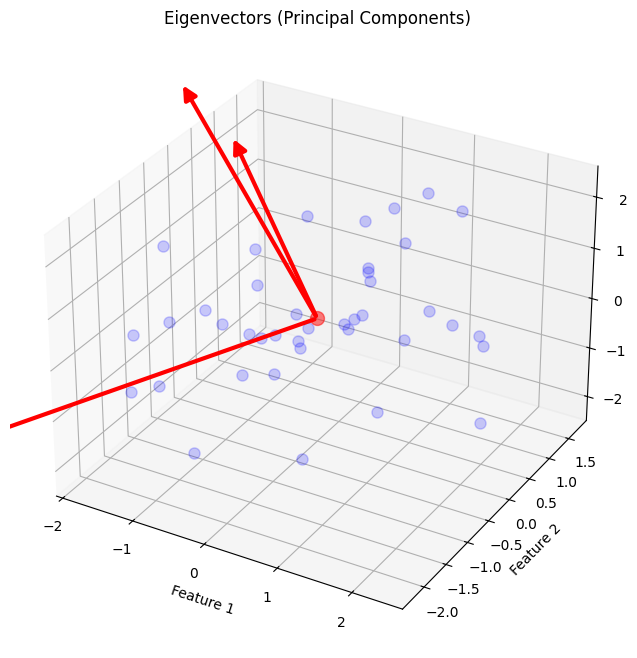

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)

# --- Visualization Logic ---
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the data points
ax.plot(df['feature1'], df['feature2'], df['feature3'],
        'o', markersize=8, color='blue', alpha=0.2)

# Plotting the mean (center of the data)
mean_val = [df['feature1'].mean(), df['feature2'].mean(), df['feature3'].mean()]
ax.plot([mean_val[0]], [mean_val[1]], [mean_val[2]],
        'o', markersize=10, color='red', alpha=0.5)

# Plotting the Eigenvectors
# Note: I multiplied 'v' by a scale factor (e.g., 5) so they are visible
scale = 5
for v in eigen_vectors.T:
    a = Arrow3D([mean_val[0], mean_val[0] + v[0] * scale],
                [mean_val[1], mean_val[1] + v[1] * scale],
                [mean_val[2], mean_val[2] + v[2] * scale],
                mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('Eigenvectors (Principal Components)')

plt.show()

In [23]:
pc = eigen_vectors[0:2]
pc

array([[-0.67045973, -0.70423894, -0.23351932],
       [-0.67452388,  0.70965023, -0.20350449]])

In [24]:

transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,1.998535,-1.139442,1
1,-1.293758,-0.511262,0
2,-0.426291,0.378520,1
3,-1.588480,-1.839970,0
4,1.347643,0.549475,1


In [25]:


new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()